In [33]:
!pip install -v tensorflow==2.10.0 opencv-python matplotlib

Using pip 23.3.2 from C:\Users\elif\AppData\Local\Programs\Python\Python310\lib\site-packages\pip (python 3.10)


In [34]:
print("hola")

hola


In [35]:
!pip list


Package                      Version
---------------------------- ---------------
absl-py                      2.0.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.2
bleach                       6.1.0
blinker                      1.6.2
bs4                          0.0.1
cachetools                   5.3.2
certifi                      2022.12.7
cffi                         1.16.0
chardet                      3.0.4
charset-normalizer           3.1.0
click                        8.1.3
colorama                     0.4.6
comm                         0.2.1
cplex                        22.1.1.0
cycler                       0.11.0
debugpy                      1.8.0
decorator                    

In [36]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

In [37]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [40]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

RuntimeError: Physical devices cannot be modified after being initialized

In [41]:
data_dir = "data"

In [42]:
os.listdir(os.path.join(data_dir, "rain"))

['1011.jpg',
 '1013.jpg',
 '1017.jpg',
 '102.jpg',
 '1021.jpg',
 '103.jpg',
 '1030.jpg',
 '1036.jpg',
 '1038.jpg',
 '1044.jpg',
 '1048.jpg',
 '105.jpg',
 '1051.jpg',
 '1053.jpg',
 '1056.jpg',
 '1058.jpg',
 '106.jpg',
 '1061.jpg',
 '1067.jpg',
 '107.jpg',
 '1070.jpg',
 '1074.jpg',
 '1075.jpg',
 '1078.jpg',
 '1082.jpg',
 '1084.jpg',
 '1088.jpg',
 '109.jpg',
 '1090.jpg',
 '11.jpg',
 '110.jpg',
 '1101.jpg',
 '1103.jpg',
 '1108.jpg',
 '1114.jpg',
 '1126.jpg',
 '113.jpg',
 '1136.jpg',
 '1139.jpg',
 '1140.jpg',
 '1141.jpg',
 '1144.jpg',
 '1145.jpg',
 '1146.jpg',
 '1150.jpg',
 '1153.jpg',
 '1157.jpg',
 '1161.jpg',
 '1162.jpg',
 '1163.jpg',
 '1165.jpg',
 '1168.jpg',
 '117.jpg',
 '1170.jpg',
 '1171.jpg',
 '1173.jpg',
 '1175.jpg',
 '1178.jpg',
 '1180.jpg',
 '1183.jpg',
 '1185.jpg',
 '119.jpg',
 '1192.jpg',
 '1196.jpg',
 '1200.jpg',
 '1207.jpg',
 '1208.jpg',
 '1210.jpg',
 '1213.jpg',
 '1215.jpg',
 '1220.jpg',
 '1222.jpg',
 '1223.jpg',
 '1226.jpg',
 '1230.jpg',
 '1233.jpg',
 '1235.jpg',
 '1237.jpg'

In [43]:
img = cv2.imread(os.path.join(data_dir, "rain", "1011.jpg"))

In [44]:
img.shape

(750, 1125, 3)

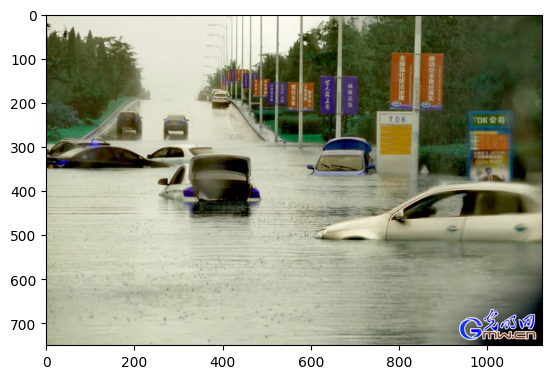

In [45]:
plt.imshow(img)

In [46]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [47]:
import numpy as np

In [86]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1147 files belonging to 2 classes.


In [87]:
data_iter = data.as_numpy_iterator()
batch = data_iter.next()

In [88]:
batch[1]
batch[0].shape

(32, 256, 256, 3)

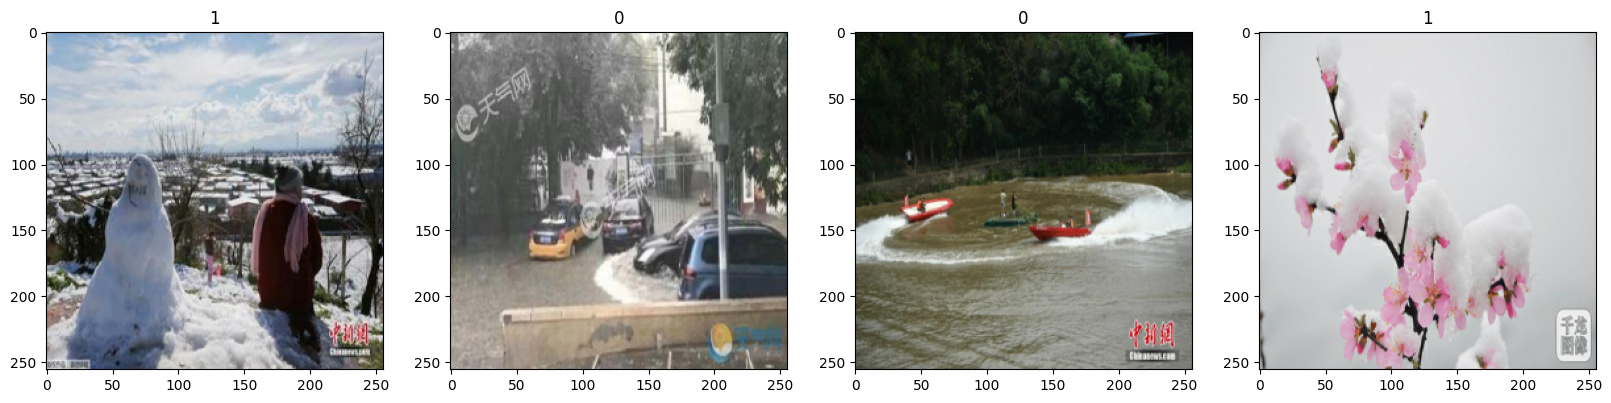

In [89]:
# class 0 -> rain
# class 1 -> snow
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

In [90]:
scaled = data.map(lambda x, y: (x / 255, y))
batch = scaled.as_numpy_iterator().next()
batch[0].max()

1.0

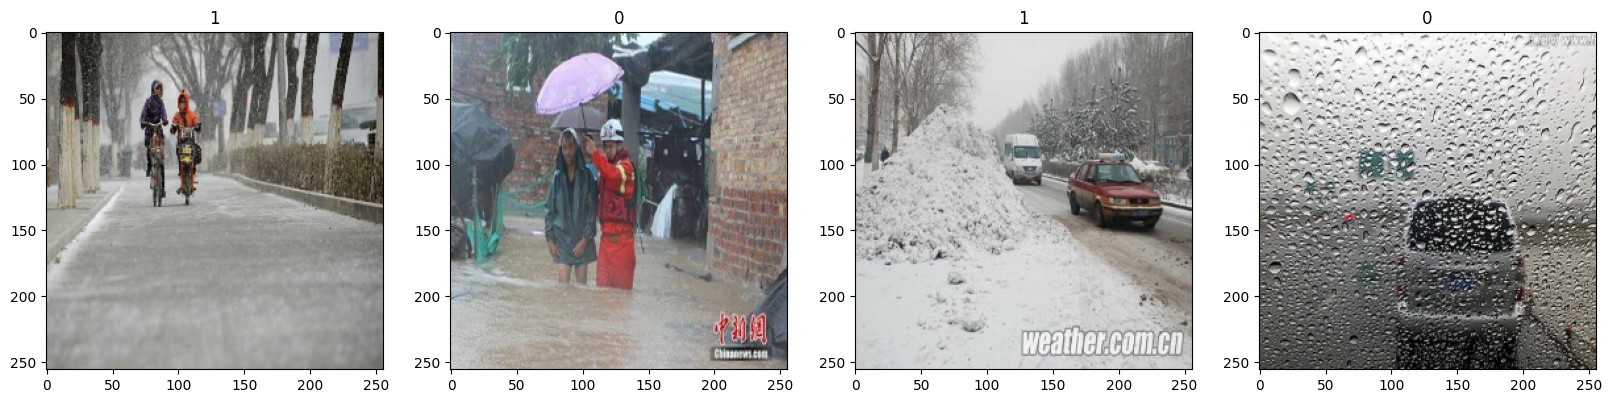

In [91]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img)
    ax[index].title.set_text(batch[1][index])

In [92]:
len(scaled)

36

In [93]:
size_train = int(len(scaled) * 0.7)
size_valid = int(len(scaled) * 0.2) + 1
size_test = int(len(scaled) * 0.1)

In [94]:
size_test

3

In [95]:
size_train

25

In [96]:
size_valid

8

In [97]:
if size_train + size_valid + size_test != len(scaled):
    print("Train, validation, and test batches does not add up to total data batches")

In [98]:
data_train = scaled.take(size_train)
data_valid = scaled.skip(size_train).take(size_valid)
data_test = scaled.skip(size_train + size_valid).take(size_test)

In [99]:
if len(data_train) + len(data_valid) + len(data_test) != len(scaled):
    print("Train, validation, and test data lengths does not add up to total data batches")

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [101]:
model = Sequential()

In [102]:
height, width, channels = scaled.element_spec[0].shape[1:]

In [103]:
model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(height, width, channels)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # determines a value between 0 and 1

In [104]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

Train

In [106]:
log_dir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [107]:
history = model.fit(data_train, epochs=25, validation_data=data_valid, callbacks=tensorboard_callback)

Epoch 1/25
25/25 [==============================] - 3s 111ms/step - loss: 0.8662 - accuracy: 0.5138 - val_loss: 0.6663 - val_accuracy: 0.5078
Epoch 2/25
25/25 [==============================] - 3s 102ms/step - loss: 0.6495 - accuracy: 0.6463 - val_loss: 0.5424 - val_accuracy: 0.7305
Epoch 3/25
25/25 [==============================] - 3s 121ms/step - loss: 0.5088 - accuracy: 0.7550 - val_loss: 0.4946 - val_accuracy: 0.7852
Epoch 4/25
25/25 [==============================] - 2s 90ms/step - loss: 0.4160 - accuracy: 0.8263 - val_loss: 0.3467 - val_accuracy: 0.8711
Epoch 5/25
25/25 [==============================] - 2s 90ms/step - loss: 0.3099 - accuracy: 0.8925 - val_loss: 0.3317 - val_accuracy: 0.8633
Epoch 6/25
25/25 [==============================] - 2s 90ms/step - loss: 0.3100 - accuracy: 0.8825 - val_loss: 0.2594 - val_accuracy: 0.8906
Epoch 7/25
25/25 [==============================] - 3s 94ms/step - loss: 0.2985 - accuracy: 0.8737 - val_loss: 0.3659 - val_accuracy: 0.8359
Epoch 8/25

Plot Loss Graph

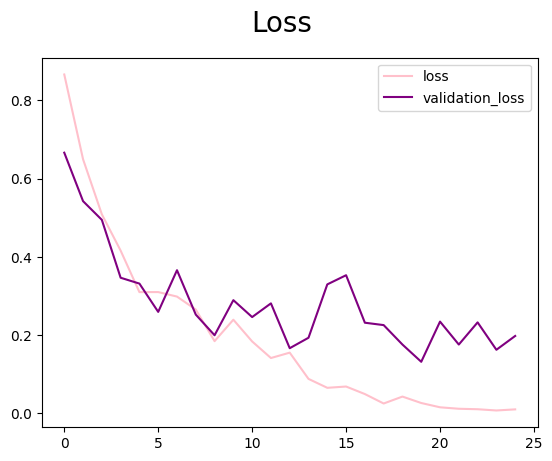

In [108]:
fig_performance = plt.figure()
plt.plot(history.history["loss"], color="pink", label="loss")
plt.plot(history.history["val_loss"], color="purple", label="validation_loss")
fig_performance.suptitle("Loss", fontsize=20)
plt.legend()
plt.show()

Plot Accuracy Graph

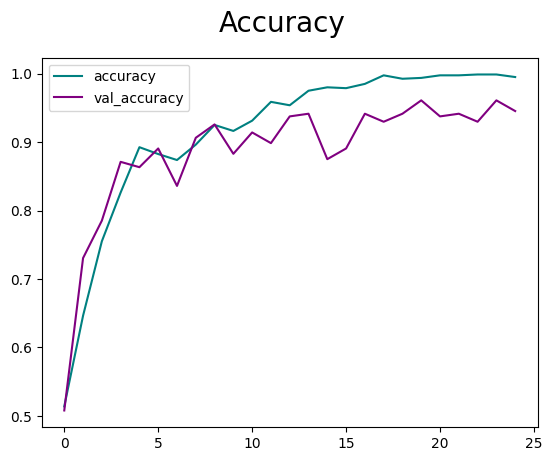

In [109]:
fig_performance = plt.figure()
plt.plot(history.history["accuracy"], color="teal", label="accuracy")
plt.plot(history.history["val_accuracy"], color="purple", label="val_accuracy")
fig_performance.suptitle("Accuracy", fontsize=20)
plt.legend()
plt.show()

Evaluate

In [110]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [111]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [112]:
for batch in data_test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 85ms/step


In [113]:
print(f"precision: {precision.result().numpy()}\nrecall: {recall.result().numpy()}\naccuracy: {accuracy.result().numpy()}\n")

precision: 0.9772727489471436
recall: 0.914893627166748
accuracy: 0.9450549483299255



Test

In [114]:
test_dir = "test_data"

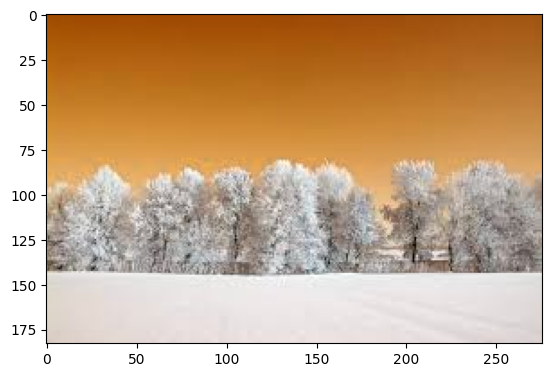

In [115]:
img = cv2.imread(os.path.join(test_dir, "snow3.jpg"))
img.shape
plt.imshow(img)

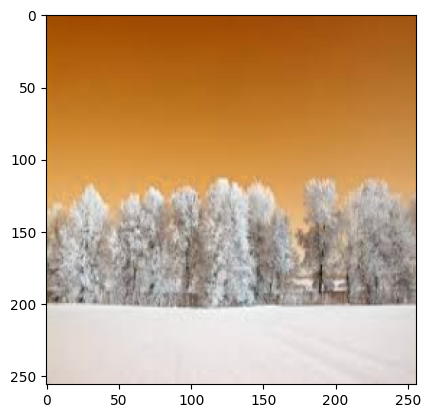

In [116]:
resized = tf.image.resize(img, (256, 256))
plt.imshow(resized.numpy().astype(int))

In [117]:
yhat = model.predict(np.expand_dims(resized/255, 0))
yhat

1/1 [==============================] - 0s 27ms/step


array([[0.9992617]], dtype=float32)

In [118]:
if yhat < 0.5:
    print("Image is rain")
else:
    print("Image is snow")

Image is snow


Save Model

In [119]:
from tensorflow.keras.models import load_model

In [120]:
model.save(os.path.join("model", "weatherclass.h5"))

In [122]:
saved_model = load_model(os.path.join("model", "weatherclass.h5"))

In [123]:
yhat = saved_model.predict(np.expand_dims(resized/255, 0))
yhat

1/1 [==============================] - 0s 80ms/step


array([[0.9992617]], dtype=float32)

In [124]:
if yhat < 0.5:
    print("Image is rain")
else:
    print("Image is snow")

Image is snow
